# 1 聚类

本文我们来总结K-means算法。

与之前介绍过的诸多分类算法不同，K-means算法属于聚类算法的范畴。说到这里，必须得所以说分类算法与聚类算法的区别。

分类算法与聚类算法最本质的区别在于分类算法是一种有监督学习方法，这一类算法在真正用于实践前，必须通过已知样本标签的数据进行训练，以建立样本特征属性到样本标签的最佳拟合模型；与之相反，无监督学习方法可以在没有任何先验知识的情况下进行分类，这种方法根据相似性原则，将具有较高相似度的数据对象划分至同一类簇，将具有较高相异度的数据对象划分至不同类簇，最终实现对数据集的分类。

# 2 K-means算法

## 2.1 算法思想

K-means算法基于距离的一类聚类算法，这类聚类算法以距离来度量对象间的相似性，两样本对象间距离越大，相似性越小。关于K-means算法，有一个非常经典的故事：

*有4个牧师去郊区村庄授课，刚开始，4个牧师在村庄里分别随机选了一个位置，然后将位置公布给全村村民，村民收到消息后，纷纷选择最近的一个牧师那里去听课。牧师授课时，众多村民反馈路途太远，于是牧师记录了来听自己授课的所有村民的居住地址，第二次授课时，牧师选择自己记录的村民的中心位置作为新的授课位置，然后将位置公布给全村村民，村民收到4位牧师新的授课位置后，同样根据距离选择最近的牧师去听课。之后4位牧师的每次一次授课都根据来听自己讲课的村民登记的居住地址来更新下一次授课的位置，而村民也更新4位牧师更新的位置来选择授课牧师，直到村民的选择不再发生变化，则牧师授课的位置也彻底稳定下来。*

K-means算法思想与上面故事中牧师选位所表现出来的原理是十分相似的，最终的目的都是实现所有样本数据（村民）到聚类中心（牧师）的距离之和最小化。K-means算法实现步骤如下：

输入：数据集$D = \{ {x_1},{x_2}, \cdots ,{x_n}\} $，聚类个数$k$
输出：聚类结果类簇

（1）随机初始化$k$个样本作为聚类中心$\{ {\mu _1},{\mu _2}, \cdots ,{\mu_k}\} $；

（2）计算数据集中所有样本$x_i$到各个聚类中心$\mu_j$的距离$dist({x_i},{\mu _j})$，并将$x_i$划分到距离最小的聚类中心所在类簇中；

（3）对于每一个类簇，更新其聚类中心：${\mu _i} = \frac{1}{{|{c_i}|}}\sum\limits_{x \in {c_i}} x $

（4）重复（2）（3）步骤，直到聚类中心不再有明显变化或满足迭代次数。



总结而言，K-means算法整个流程可总结为一个优化问题，通过不断迭代使得目标函数收敛，K-means算法目标函数为：
$$J = \sum\nolimits_{j = 1}^k {\sum\nolimits_{i = 1}^n {dist({x_i},{\mu _j})} } $$

从目标函数中可以看出，有两个因素对聚类结果有着至关重要的影响：$k$值、距离度量方式。

对于$k$值，这是K-means算法一个绕不开的问题，直接影响着最终聚类结果的准确性，对于如何确定$k$值，在传统的的K-means算法中，在对数据分布未知的情况下只能通过多次尝试不同的$k$值来探索最优取值。值得一说的时，众多专家学者针对K-means算法中如何确定$k$值、甚至避开$k$值的的问题对K-means算法进行优化改进，设计了许多改进的K-means算法，这又是一个大话题了，本文不在深究。  
下面在说说距离度量的问题。

# 2.2 距离度量

对于K-means算法这类基于距离（其他还有基于密度、网格、层次、模型）的聚类算法，距离度量贯穿了算法的整个流程，所以选择一种合适的距离度量方式尤为重要。  
这里列举几种常见的距离度量方式。

（1）闵可夫斯基距离（Minkowski Distance）
对于两个给定的$d$维数据样本$X = ({x_1},{x_2}, \cdots ,{x_p})$，$Y = ({y_1},{y_2}, \cdots ,{y_p})$，闵可夫斯基距离定义为：
$$dist(X,Y) = \root p \of {\sum\limits_{i = 1}^d {|{x_i} - {y_i}{|^p}} } $$

当$p=1$时，闵可夫斯基距离又被称为曼哈顿距离(Manhattan Distance)：
$$dist(X,Y) = \sum\limits_{i = 1}^d {|{x_i} - {y_i}|} $$
曼哈顿距离可以看做是数据样本在各维度差值的绝对值之和，又被称为折线距离、街区距离。相比于欧氏距离，曼哈顿距离没进行平方运算，所以对离群点不敏感。

当$p=2$时，闵可夫斯基距离就是我们熟悉的欧氏距离：
$$dist(X,Y) = \sqrt {\sum\limits_{i = 1}^d {|{x_i} - {y_i}{|^2}} } $$

（2）余弦距离（Cosine）

余弦距离以两向量夹角余弦值来反映相似度，取值在$[0,1]$之间，值越大，相似度越大。  
$$dist(X,Y) = \cos (X,Y) = \frac{{\sum\nolimits_{i = 1}^d {{x_i}{y_i}} }}{{\sqrt {\sum\nolimits_{i = 1}^d {{{({x_i})}^2}} } \sqrt {\sum\nolimits_{i = 1}^d {{{({y_i})}^2}} } }}$$

余弦距离在文本识别中应用比较普遍。

（3）切比雪夫距离 (Chebyshev Distance )

切比雪夫距离是以各维度差值的最大值作为最终的相似度：
$$dist(X,Y) = \mathop {\max }\limits_i (|{x_i} - {y_i}|)$$

除了这三个常用距离外，还有马氏距离、皮尔逊相关系数、KL散度等等距离度量方法。

# 2.3 算法总结

K-means算法是一个应用十分广泛、出场率极高的一个聚类算法，思想简单，解释性强，设定好$k$值后即可输出指定数量的类簇。不过，在实际应用中，也需要注意K-means算法的不足之处：
- K-means算法的$k$值必须在聚类前确定，在缺乏对数据集分布认知的情况下这往往是很难估计的，只能通过多次的尝试探索最佳的$k$值。
- K-means算法第一次迭代时的$k$个聚类中心对算法最终结果有很大影响，但在K-means算法中，第一次迭代的$k$各聚类中心是随机选定的，这给算法聚类结果带来了不确定性。
- K-means算法对非球状分布的数据集上表现不佳。K-means算法这类基于距离的聚类算法基本假设是同一类簇内部对象间距离远小于不同类簇间对象距离，这种假设相当于将类簇看作是一个球状，所以对非球状分布的数据集，K-means算法表现可能并不佳。
- K-means算法在不断迭代过程中使得算法逐渐优化，在每一次迭代中，都必须计算每一个对象与聚类中心的距离，所以当数据量非常大时，时间开销比较大。


天下没有免费的误差，也没有适合所有场景的算法，想要享受算法有点，就必须承受算法的不足，根据实际应用选择合适的算法才是最佳选择。

# 3 python实现K-means算法

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import copy

先创建一个包含3个类簇的数据集：

In [2]:
a = np.random.normal(20,5,300)
b = np.random.normal(15,5,300)
cluster1 = np.array([[x, y] for x, y in zip(a,b)])

In [3]:
a = np.random.normal(20,5,300)
b = np.random.normal(45,5,300)
cluster2 = np.array([[x, y] for x, y in zip(a,b)])

In [4]:
a = np.random.normal(55,5,300)
b = np.random.normal(30,5,300)
cluster3 = np.array([[x, y] for x, y in zip(a,b)])

In [5]:
dataset = np.append(np.append(cluster1,cluster2, axis=0),cluster3, axis=0)

展示一下刚创建的数据集：

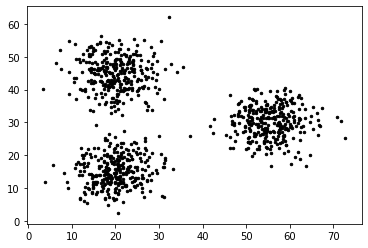

In [6]:
for i in dataset:
    plt.scatter(i[0], i[1],c='black',s=6)
plt.show()

定义一个方法用于计算欧氏距离：

In [7]:
def calc_dist(simple1, simple2):
    """计算两数据对象间的欧氏距离"""
    return np.linalg.norm(simple1-simple2) 

定义一个方法用于算法第一次迭代时随机出世后聚类中心：

In [8]:
def init_centers(k, dataset):
    """随机获取k个初始化聚类中心"""
    shuffle_array = np.arange(dataset.shape[0])
    np.random.shuffle(shuffle_array)
    center_index = shuffle_array[:k]  # 获取k个随机索引
    center_dict = {}
    for i in range(k):
        center = dataset[center_index[i]]  # 聚类中心
        center_dict[i] = center
    return center_dict

In [9]:
def k_means(k,dataset):
    """实现K-means算法"""
    ds = copy.deepcopy(dataset)  # 复制一份数据
    
    epoch = 0 # 迭代次数
    center_dict = init_centers(k, ds)  # 第一次迭代时，随机初始化k个聚类中心
    ds = np.insert(ds, 2, values=-1, axis=1)  # 插入一列作为类标签，默认为0
    total_last = np.inf  # 上一次迭代距离总和
    while epoch<=20:  # 迭代次数少于20次时继续迭代，也可以直接设为True，当目标函数收敛时自动结束迭代
        cluster_dist = {i:0 for i in range(k)}  # 记录每一个类簇距离总和
        
        for simple in ds:
            min_dist = np.inf   # simple 到最近的聚类中心的距离
            min_label = -1    # 最近的聚类中心类标签
            for label in center_dict.keys():
                dist = calc_dist(simple[:2], center_dict[label])
                if dist < min_dist:
                    min_dist = dist
                    min_label = label
            simple[2] = min_label  # 将当前样本点划分到最近的聚类中心所在聚类中
            cluster_dist[int(min_label)] = cluster_dist[int(min_label)] + min_dist  # 更新类簇内部距离总和
        loss_now = sum(cluster_dist.values())  # 所有类簇内部距离总和
        
        print("epoch:{}, tatal distance: {}".format(epoch,loss_now))
        for i in ds:
            if i[2] == 0:
                plt.scatter(i[0], i[1],c='red',s=6)
            elif i[2] == 1:
                plt.scatter(i[0], i[1],c='green',s=6)
            else:
                        plt.scatter(i[0], i[1],c='blue',s=6)
        for center in center_dict.values():
            plt.scatter(center[0], center[1],c='black')
        plt.show()
        if total_last == loss_now:  # 如果两次迭代距离总和都不变，证明已收敛
            break
        total_last = loss_now
        for label in center_dict.keys():  # 更新聚类中心
            simple_list = ds[ds[:,2]==label]  # 挑选出类标签为k的所有样本
            x = np.mean(simple_list[:, 0])
            y = np.mean(simple_list[:, 1])
            center_dict[label] = [x, y]
        epoch += 1
    
    return ds, center_dict

epoch:0, tatal distance: 12934.408559284844


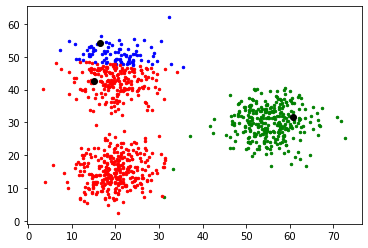

epoch:1, tatal distance: 7964.838789624616


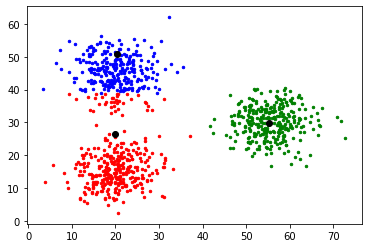

epoch:2, tatal distance: 5778.574439702343


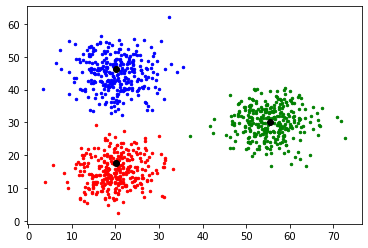

epoch:3, tatal distance: 5628.049794639323


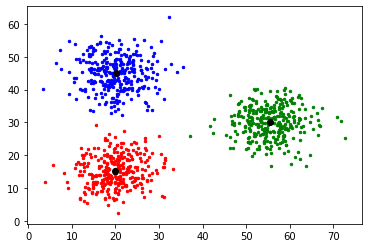

epoch:4, tatal distance: 5628.049794639323


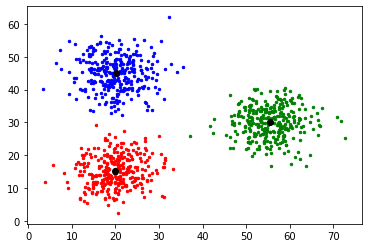

In [12]:
ds,cluster_label = k_means(3,dataset)

好了，K-means算法就算实现好了，从上多幅图中可以看到每一次迭代聚类中心是如何变化的。